In [2]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [3]:
import zipfile

# Unzip the archive
local_zip = '/content/kpt-scem.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [4]:
import os

base_dir = '/content'

# print("Contents of base directory:")
# print(os.listdir(base_dir))

# print("\nContents of train directory:")
# print(os.listdir(f'{base_dir}/train'))

# print("\nContents of validation directory:")
# print(os.listdir(f'{base_dir}/validation'))

train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
# train_cats_dir = os.path.join(train_dir, 'cats')
# train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
# validation_cats_dir = os.path.join(validation_dir, 'cats')
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(310, 154, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 308, 152, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 154, 76, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 152, 74, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 76, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 35, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 17, 64)       0

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# from tensorflow.keras.optimizers import RMSprop

# model.compile(optimizer=RMSprop(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics = ['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode='categorical',
                                                    target_size=(310, 154))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         class_mode  = 'categorical',
                                                         target_size = (310, 154))

Found 1142 images belonging to 4 classes.
Found 273 images belonging to 4 classes.


In [11]:
history = model.fit(
            train_generator,
            epochs=100,
            validation_data=validation_generator,
            verbose=1)

Epoch 1/100
36/36 [==============================] - 4s 108ms/step - loss: 0.3126 - accuracy: 0.8940 - val_loss: 1.0180 - val_accuracy: 0.6703
Epoch 2/100
36/36 [==============================] - 4s 103ms/step - loss: 0.2819 - accuracy: 0.8949 - val_loss: 1.1766 - val_accuracy: 0.6813
Epoch 3/100
36/36 [==============================] - 4s 104ms/step - loss: 0.2791 - accuracy: 0.9019 - val_loss: 1.0630 - val_accuracy: 0.6777
Epoch 4/100
36/36 [==============================] - 4s 104ms/step - loss: 0.2431 - accuracy: 0.9177 - val_loss: 1.2530 - val_accuracy: 0.7143
Epoch 5/100
36/36 [==============================] - 4s 108ms/step - loss: 0.2349 - accuracy: 0.9194 - val_loss: 1.0670 - val_accuracy: 0.6850
Epoch 6/100
36/36 [==============================] - 4s 114ms/step - loss: 0.1543 - accuracy: 0.9492 - val_loss: 1.2392 - val_accuracy: 0.6996
Epoch 7/100
36/36 [==============================] - 4s 103ms/step - loss: 0.1408 - accuracy: 0.9466 - val_loss: 1.3012 - val_accuracy: 0.7363

Saving kpt-scem_628.0-630.0.png to kpt-scem_628.0-630.0.png
[[3.9837530e-04 2.7191680e-05 9.9635351e-01 3.2208893e-03]]


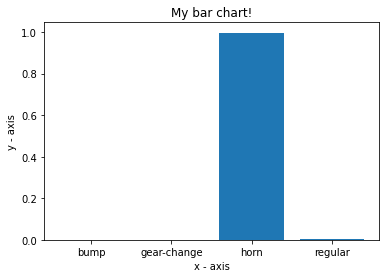

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
    # predicting images
    path='/content/' + fn
    img=image.load_img(path, target_size=(310, 154, 3))
    
    x=image.img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
    classes = model.predict(images, batch_size=10)

    print(classes)

    # x-coordinates of left sides of bars 
    left = [1, 2, 3, 4]

    # heights of bars
    height = classes[0]

    # labels for bars
    tick_label = ['bump', 'gear-change', 'horn', 'regular']

    # plotting a bar chart
    plt.bar(left, height, tick_label = tick_label,
            width = 0.8)

    # naming the x-axis
    plt.xlabel('x - axis')
    # naming the y-axis
    plt.ylabel('y - axis')
    # plot title
    plt.title('My bar chart!')

    # function to show the plot
    plt.show()

In [20]:
model.save('my_model.h5')